In [908]:
import pandas as pd  
import numpy as np  
from sklearn.model_selection import train_test_split  
from sklearn.svm import SVC  
from sklearn.metrics import classification_report, confusion_matrix  
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [909]:
HKweather = pd.read_csv('weather.csv')
HKweather = HKweather.dropna(axis=0, how='any')
HKweather.dropna(subset = ["mean_temp"], inplace=True)

In [910]:
HKweather.head()

,mean_temp,Grass_Min_Temp,max_Temp,mean_amount_of_cloud,mean_dew_point_temp,mean_wet_bulb_temp,min_temp,pressure,rainfall,RH,date
0,17.7,12.4,20.7,32.0,13.4,15.2,15.5,1018.7,0,77.0,1970-01-01
1,19.5,12.8,22.9,44.0,14.1,16.4,17.2,1018.6,0,72.0,1970-01-02
2,18.8,14.7,21.2,35.0,13.3,15.7,17.5,1019.2,0,71.0,1970-01-03
3,17.9,13.8,20.7,20.0,13.1,15.2,16.1,1020.6,0,74.0,1970-01-04
4,14.7,13.1,18.2,66.0,7.4,11.1,11.8,1026.0,Trace,62.0,1970-01-05


In [911]:
HKweather.describe()

,mean_temp,max_Temp,mean_amount_of_cloud,mean_dew_point_temp,mean_wet_bulb_temp,min_temp,pressure,RH
count,18262.000000,18262.000000,18262.000000,18262.000000,18262.000000,18262.000000,18262.000000,18262.000000
mean,23.273371,25.795252,67.683167,19.040872,20.669521,21.336119,1012.859221,78.115048
std,5.157305,5.368484,25.313214,6.115033,5.239232,5.204577,6.511790,10.642117
min,4.900000,7.100000,0.000000,-8.100000,2.400000,3.100000,986.500000,24.000000
25%,19.100000,21.500000,51.250000,14.900000,16.600000,17.200000,1007.900000,73.000000
50%,24.400000,26.800000,76.000000,20.600000,21.900000,22.600000,1012.800000,79.000000
75%,27.800000,30.400000,88.000000,24.500000,25.500000,25.800000,1017.900000,85.000000
max,32.400000,36.600000,100.000000,27.400000,28.300000,30.100000,1034.600000,99.000000


In [912]:
HKweather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18262 entries, 0 to 18599
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   mean_temp             18262 non-null  float64
 1   Grass_Min_Temp        18262 non-null  object 
 2   max_Temp              18262 non-null  float64
 3   mean_amount_of_cloud  18262 non-null  float64
 4   mean_dew_point_temp   18262 non-null  float64
 5   mean_wet_bulb_temp    18262 non-null  float64
 6   min_temp              18262 non-null  float64
 7   pressure              18262 non-null  float64
 8   rainfall              18262 non-null  object 
 9   RH                    18262 non-null  float64
 10  date                  18262 non-null  object 
dtypes: float64(8), object(3)
memory usage: 1.7+ MB


In [913]:
HKweather['rainfall'] = HKweather['rainfall'].replace(['Trace'],'0')
HKweather['rainfall']=HKweather.rainfall.astype(float)
HKweather['daily_temp_diff']= HKweather['max_Temp'] - HKweather['min_temp']
HKweather['daily_temp_diff']

0        5.2
1        5.7
2        3.7
3        4.6
4        6.4
        ... 
18595    5.7
18596    4.1
18597    1.7
18598    3.7
18599    2.2
Name: daily_temp_diff, Length: 18262, dtype: float64

In [914]:
HKweather['year'] = pd.DatetimeIndex(HKweather['date']).year
HKweather['month'] = pd.DatetimeIndex(HKweather['date']).month


In [915]:
HKweather['month1'] = HKweather['month'].apply(int)
season= {12:'Winter',1:'Winter',2:'Winter',3:'Spring',4:'Spring',5:'Spring',6:'Summer',7:'Summer',8:'Summer',
    9:'Autumn',10:'Autumn',11:'Autumn'
}

HKweather = HKweather.replace({'month1':season})
HKweather['israin'] = np.where(HKweather['rainfall']<=10, 0, 1)


In [916]:
HKweather.head()


,mean_temp,Grass_Min_Temp,max_Temp,mean_amount_of_cloud,mean_dew_point_temp,mean_wet_bulb_temp,min_temp,pressure,rainfall,RH,date,daily_temp_diff,year,month,month1,israin
0,17.7,12.4,20.7,32.0,13.4,15.2,15.5,1018.7,0.0,77.0,1970-01-01,5.2,1970,1,Winter,0
1,19.5,12.8,22.9,44.0,14.1,16.4,17.2,1018.6,0.0,72.0,1970-01-02,5.7,1970,1,Winter,0
2,18.8,14.7,21.2,35.0,13.3,15.7,17.5,1019.2,0.0,71.0,1970-01-03,3.7,1970,1,Winter,0
3,17.9,13.8,20.7,20.0,13.1,15.2,16.1,1020.6,0.0,74.0,1970-01-04,4.6,1970,1,Winter,0
4,14.7,13.1,18.2,66.0,7.4,11.1,11.8,1026.0,0.0,62.0,1970-01-05,6.4,1970,1,Winter,0


<AxesSubplot:xlabel='month1', ylabel='rainfall'>

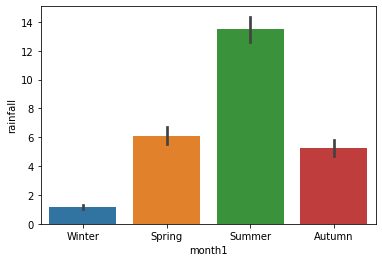

In [817]:
sns.barplot(data= HKweather, x= 'month1', y="rainfall")

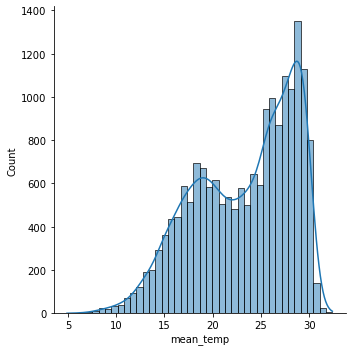

In [818]:
sns.displot(HKweather['mean_temp'],kde=True)

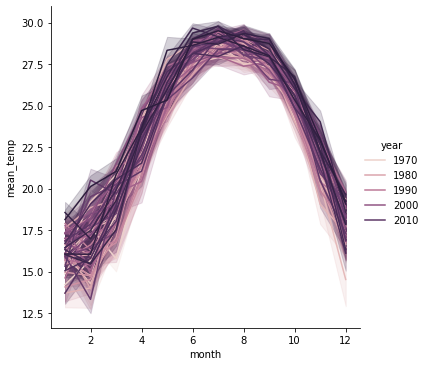

In [819]:
sns.relplot(data=HKweather, x="month", y="mean_temp", hue="year", kind="line")

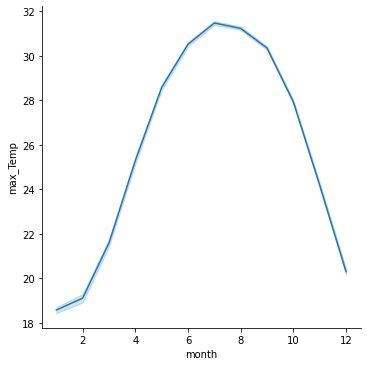

In [820]:
sns.relplot(data=HKweather, x="month", y="max_Temp", kind="line")

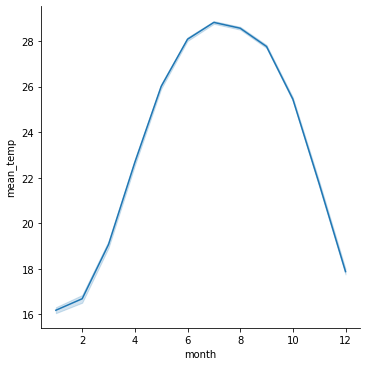

In [821]:
sns.relplot(data=HKweather, x="month", y="mean_temp", kind="line")

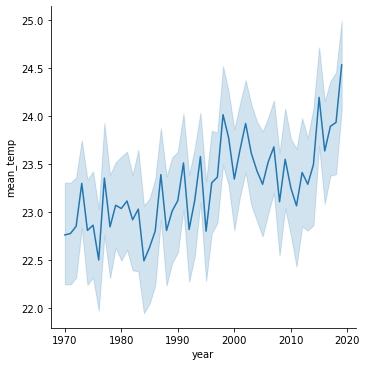

In [822]:
sns.relplot(data=HKweather, x="year", y="mean_temp", kind="line")

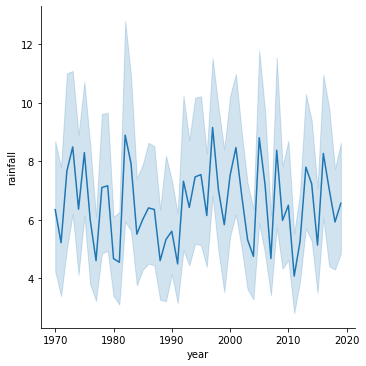

In [823]:
sns.relplot(data=HKweather, x="year", y="rainfall", kind="line")

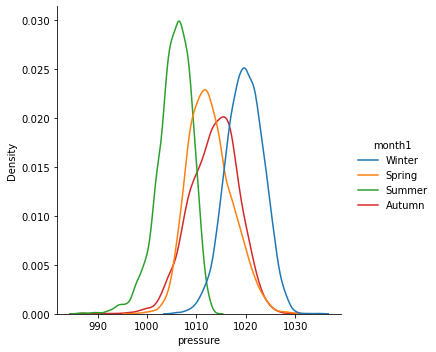

In [824]:
sns.displot(data=HKweather, x="pressure",hue='month1', kind="kde")

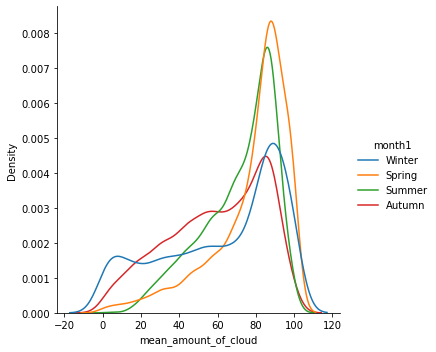

In [825]:

sns.displot(data=HKweather, x="mean_amount_of_cloud",hue='month1', kind="kde")

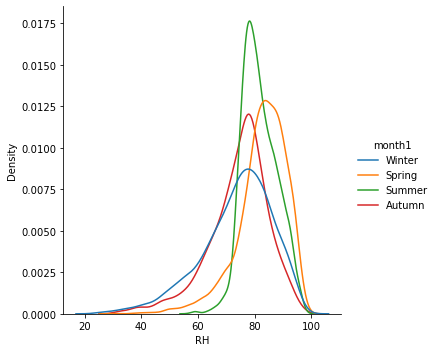

In [826]:
sns.displot(data=HKweather, x="RH",hue='month1', kind="kde")

In [851]:
HKweather= HKweather.drop('Grass_Min_Temp', axis=1)


In [855]:
HKweather1 = HKweather.drop(['max_Temp','min_temp','date', 'month', 'israin','year'], axis=1)
HKweather1

,mean_temp,mean_amount_of_cloud,mean_dew_point_temp,mean_wet_bulb_temp,pressure,rainfall,RH,daily_temp_diff,month1
0,17.7,32.0,13.4,15.2,1018.7,0.0,77.0,5.2,Winter
1,19.5,44.0,14.1,16.4,1018.6,0.0,72.0,5.7,Winter
2,18.8,35.0,13.3,15.7,1019.2,0.0,71.0,3.7,Winter
3,17.9,20.0,13.1,15.2,1020.6,0.0,74.0,4.6,Winter
4,14.7,66.0,7.4,11.1,1026.0,0.0,62.0,6.4,Winter
...,...,...,...,...,...,...,...,...,...
18595,18.0,23.0,11.2,14.3,1020.3,0.0,65.0,5.7,Winter
18596,18.5,64.0,13.1,15.4,1020.2,0.0,72.0,4.1,Winter
18597,18.8,92.0,16.8,17.6,1018.3,9.3,88.0,1.7,Winter
18598,20.3,90.0,18.7,19.3,1020.0,0.3,91.0,3.7,Winter


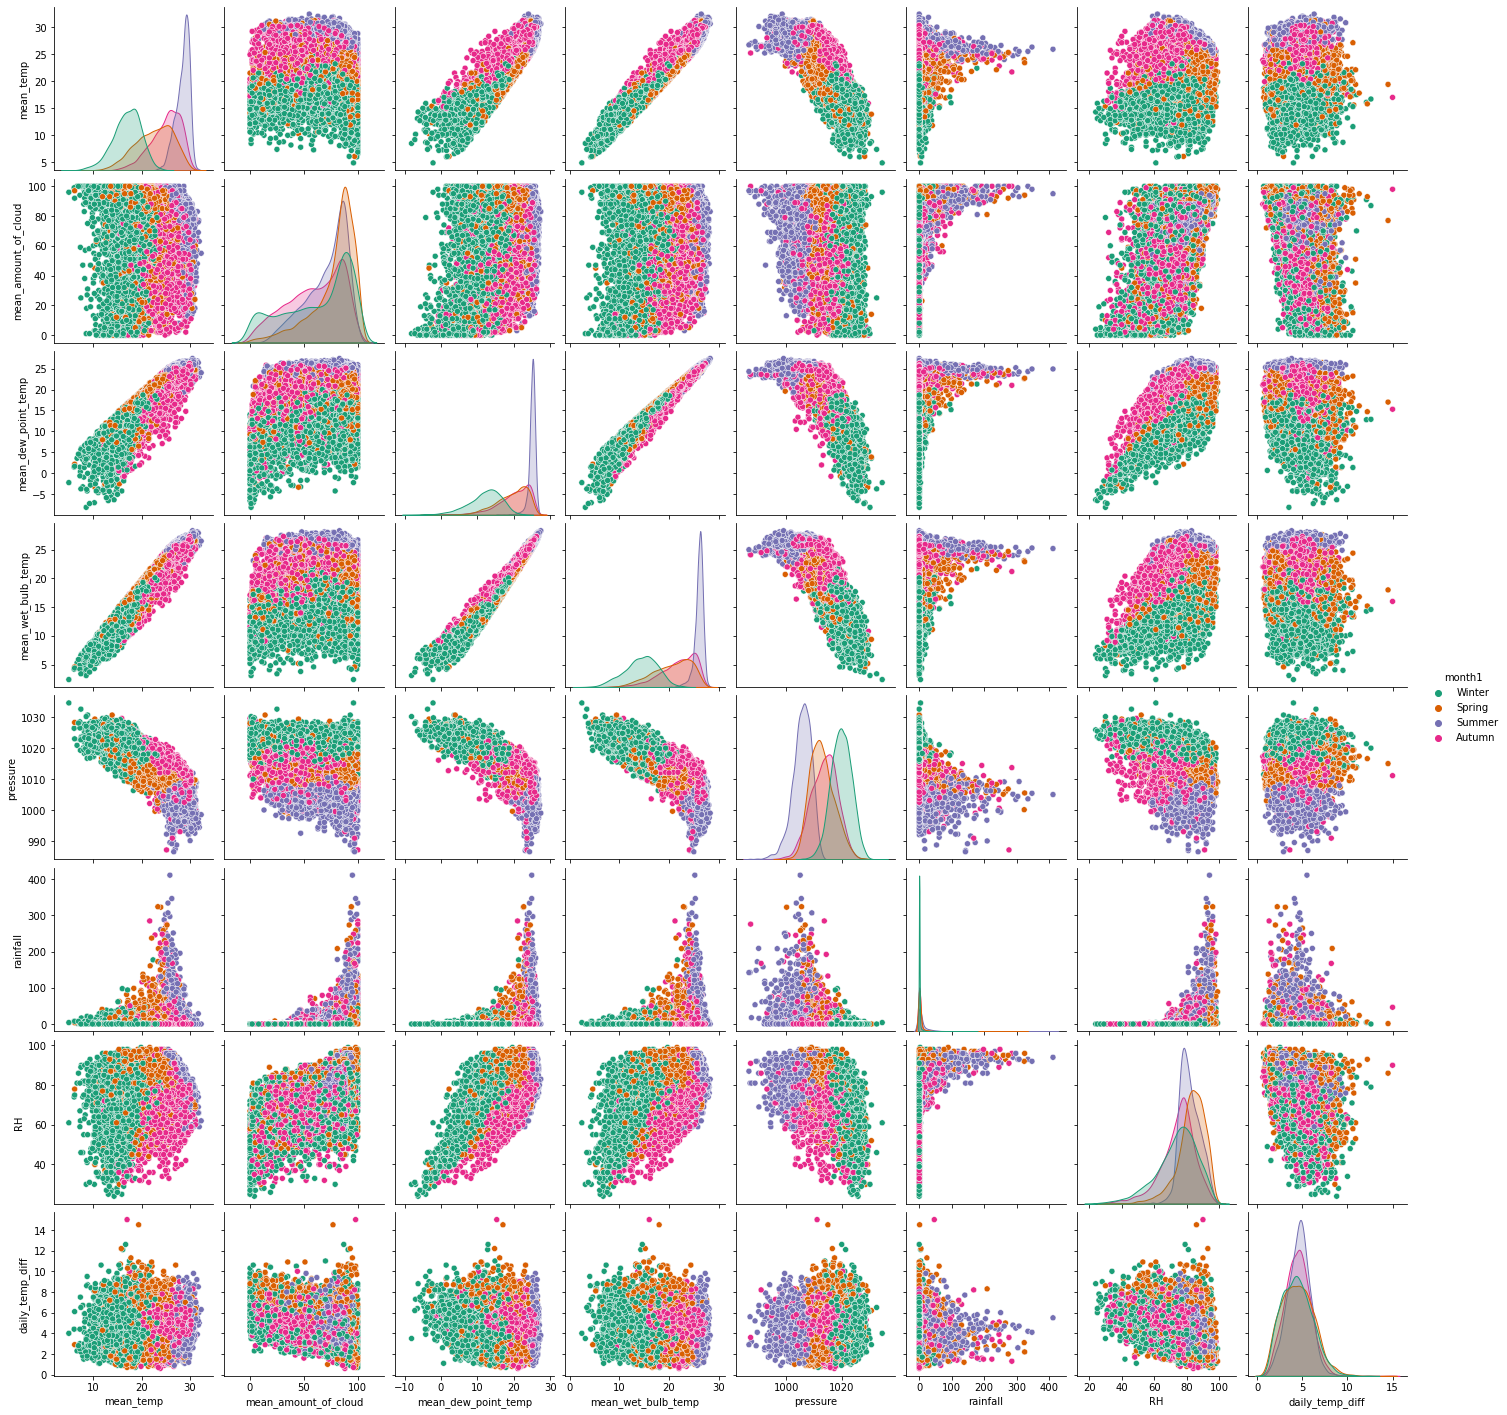

In [856]:
sns.pairplot(data=HKweather1,palette='Dark2',hue = 'month1')

In [857]:
HKweather1.corr()

,mean_temp,mean_amount_of_cloud,mean_dew_point_temp,mean_wet_bulb_temp,pressure,rainfall,RH,daily_temp_diff
mean_temp,1.000000,0.006290,0.924486,0.972686,-0.825925,0.118898,0.258278,0.086225
mean_amount_of_cloud,0.006290,1.000000,0.247970,0.155048,-0.244392,0.260279,0.621367,-0.493383
mean_dew_point_temp,0.924486,0.247970,1.000000,0.986165,-0.847685,0.216166,0.604145,-0.073996
mean_wet_bulb_temp,0.972686,0.155048,0.986165,1.000000,-0.858095,0.192349,0.472749,-0.009133
pressure,-0.825925,-0.244392,-0.847685,-0.858095,1.000000,-0.280949,-0.440279,-0.002073
rainfall,0.118898,0.260279,0.216166,0.192349,-0.280949,1.000000,0.327977,-0.076728
RH,0.258278,0.621367,0.604145,0.472749,-0.440279,0.327977,1.000000,-0.364045
daily_temp_diff,0.086225,-0.493383,-0.073996,-0.009133,-0.002073,-0.076728,-0.364045,1.000000


<AxesSubplot:>

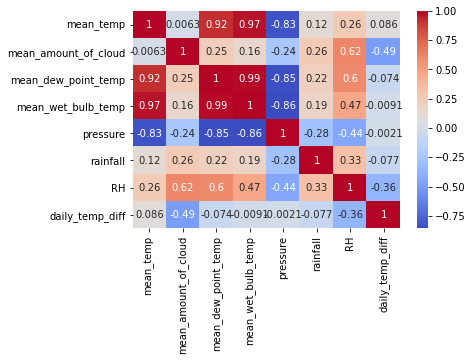

In [858]:
sns.heatmap(HKweather1.corr(), cmap='coolwarm',annot=True)

In [859]:
HKweather['month1']= HKweather['month1'].astype(str)
HKweather['month1']

0        Winter
1        Winter
2        Winter
3        Winter
4        Winter
          ...  
18595    Winter
18596    Winter
18597    Winter
18598    Winter
18599    Winter
Name: month1, Length: 18262, dtype: object

In [921]:
HKweather.head()

,mean_temp,Grass_Min_Temp,max_Temp,mean_amount_of_cloud,mean_dew_point_temp,mean_wet_bulb_temp,min_temp,pressure,rainfall,RH,date,daily_temp_diff,year,month,month1,israin,hotwarning,coldwarning
0,17.7,12.4,20.7,32.0,13.4,15.2,15.5,1018.7,0.0,77.0,1970-01-01,5.2,1970,1,Winter,0,0,0
1,19.5,12.8,22.9,44.0,14.1,16.4,17.2,1018.6,0.0,72.0,1970-01-02,5.7,1970,1,Winter,0,0,0
2,18.8,14.7,21.2,35.0,13.3,15.7,17.5,1019.2,0.0,71.0,1970-01-03,3.7,1970,1,Winter,0,0,0
3,17.9,13.8,20.7,20.0,13.1,15.2,16.1,1020.6,0.0,74.0,1970-01-04,4.6,1970,1,Winter,0,0,0
4,14.7,13.1,18.2,66.0,7.4,11.1,11.8,1026.0,0.0,62.0,1970-01-05,6.4,1970,1,Winter,0,0,1


In [ ]:
#logistics regression

In [674]:
from sklearn.model_selection import train_test_split

In [676]:
X_train, X_test, y_train, y_test = train_test_split(HKweather.drop(['rainfall','date', 'year','month1','month','israin','daily_temp_diff','max_Temp','min_temp'],axis=1), 
                                                   HKweather['israin'], test_size=0.30, 
                                                    random_state=101)

In [677]:
from sklearn.preprocessing import StandardScaler
X_train_scaled_features = StandardScaler().fit_transform(X_train.values)
X_test_scaled_features = StandardScaler().fit_transform(X_test.values)

In [678]:
X_train_scaled_features_df = pd.DataFrame(X_train_scaled_features, index=X_train.index, columns=X_train.columns)

In [679]:
X_test_scaled_features_df = pd.DataFrame(X_test_scaled_features, index=X_test.index, columns=X_test.columns)

In [680]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_1 = sc.fit_transform(X_train)
X_test_1 = sc.transform(X_test)

In [682]:
from sklearn.linear_model import LogisticRegression

In [683]:
logmodel = LogisticRegression()
logmodel.fit(X_train_scaled_features,y_train)
logmodel.score(X_train_scaled_features, y_train)

0.9047954314323711

In [684]:
predictions = logmodel.predict(X_test_scaled_features)

In [685]:
predictions 

array([0, 1, 0, ..., 0, 0, 0])

In [686]:
y_test

8123     0
15086    1
1458     0
1338     1
7534     0
        ..
3022     0
10879    0
9434     0
4015     0
10902    0
Name: israin, Length: 5479, dtype: int64

In [687]:
data = {'Predicted': predictions, 'Actual': y_test}
df = pd.DataFrame(data=data)
df

,Predicted,Actual
8123,0,0
15086,1,1
1458,0,0
1338,0,1
7534,0,0
...,...,...
3022,0,0
10879,0,0
9434,0,0
4015,0,0


In [688]:
pd.DataFrame({
    'variaable': [c for c in X_train_scaled_features_df.columns], 
    'coefficient': [round(x,2) for x in logmodel.coef_[0]]
}) \
  .sort_values('coefficient', ascending=False) \
  .style.bar(color=['grey', 'lightblue'], align='zero')

,variaable,coefficient
5,RH,2.520000
1,mean_amount_of_cloud,1.220000
3,mean_wet_bulb_temp,0.900000
0,mean_temp,0.270000
2,mean_dew_point_temp,-0.470000
4,pressure,-0.880000


In [689]:
pred_proba_df = pd.DataFrame(logmodel.predict_proba(X_test_scaled_features))
pred_proba_df.head(5)

,0,1
0,0.999714,0.000286
1,0.288633,0.711367
2,0.999984,0.000016
3,0.876199,0.123801
4,0.642569,0.357431


In [690]:
from sklearn.metrics import accuracy_score
log_test_acc=accuracy_score(y_test, predictions)
log_train_acc=accuracy_score(y_train,logmodel.predict(X_train_scaled_features))

In [691]:
print("Accuracy of logistic_test: %.2f%%" % (log_test_acc* 100.0))
print("Accuracy of logistic_train: %.2f%%" % (log_train_acc * 100.0))

Accuracy of logistic_test: 90.56%
Accuracy of logistic_train: 90.48%


In [692]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[4553,  165],
       [ 352,  409]])

In [693]:
from sklearn.metrics import classification_report

In [694]:
# This is the confusion matrix
from IPython.display import Image
from IPython.core.display import HTML 
Image(url='https://cdn-images-1.medium.com/max/1600/1*OhEnS-T54Cz0YSTl_c3Dwg.jpeg')

In [695]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      4718
           1       0.71      0.54      0.61       761

    accuracy                           0.91      5479
   macro avg       0.82      0.75      0.78      5479
weighted avg       0.90      0.91      0.90      5479



In [696]:
HKweather

,mean_temp,max_Temp,mean_amount_of_cloud,mean_dew_point_temp,mean_wet_bulb_temp,min_temp,pressure,rainfall,RH,date,daily_temp_diff,year,month,month1,israin
0,17.7,20.7,32.0,13.4,15.2,15.5,1018.7,0.0,77.0,1970-01-01,5.2,1970,1,Winter,0
1,19.5,22.9,44.0,14.1,16.4,17.2,1018.6,0.0,72.0,1970-01-02,5.7,1970,1,Winter,0
2,18.8,21.2,35.0,13.3,15.7,17.5,1019.2,0.0,71.0,1970-01-03,3.7,1970,1,Winter,0
3,17.9,20.7,20.0,13.1,15.2,16.1,1020.6,0.0,74.0,1970-01-04,4.6,1970,1,Winter,0
4,14.7,18.2,66.0,7.4,11.1,11.8,1026.0,0.0,62.0,1970-01-05,6.4,1970,1,Winter,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18595,18.0,21.3,23.0,11.2,14.3,15.6,1020.3,0.0,65.0,2019-12-27,5.7,2019,12,Winter,0
18596,18.5,20.9,64.0,13.1,15.4,16.8,1020.2,0.0,72.0,2019-12-28,4.1,2019,12,Winter,0
18597,18.8,19.6,92.0,16.8,17.6,17.9,1018.3,9.3,88.0,2019-12-29,1.7,2019,12,Winter,0
18598,20.3,22.5,90.0,18.7,19.3,18.8,1020.0,0.3,91.0,2019-12-30,3.7,2019,12,Winter,0


In [703]:
#Decision Tree

In [704]:
from sklearn.tree import DecisionTreeClassifier

In [705]:
dtree = DecisionTreeClassifier(max_depth=2)

In [706]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [707]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [708]:
def f1_scores_by_depth(depth):
    dtree = DecisionTreeClassifier(max_depth=depth)
    dtree.fit(X_train, y_train)
    return f1_score(y_true=y_train, y_pred=dtree.predict(X_train)), \
            f1_score(y_true=y_test, y_pred=dtree.predict(X_test))

<AxesSubplot:>

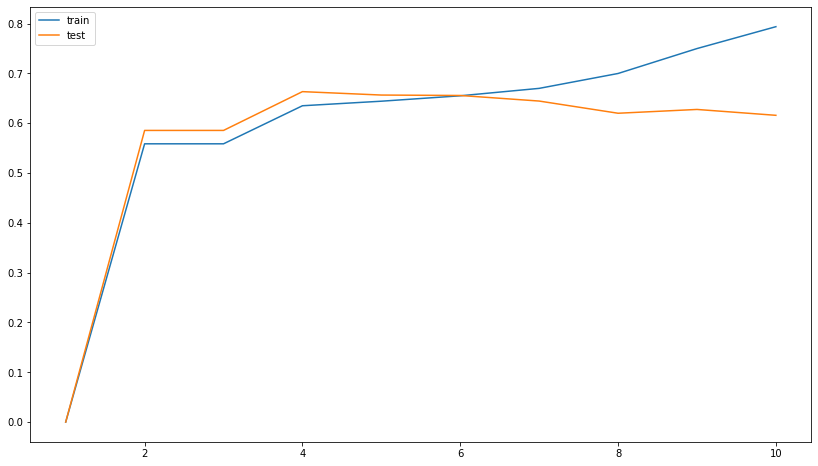

In [709]:
pd.DataFrame([f1_scores_by_depth(depth) for depth in range(1,11)], 
             columns=['train', 'test'], 
             index=range(1,11)) \
  .plot(figsize=(14,8))

In [710]:
predictions = dtree.predict(X_test)

In [711]:
from sklearn.metrics import classification_report,confusion_matrix

In [712]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      4718
           1       0.72      0.49      0.59       761

    accuracy                           0.90      5479
   macro avg       0.82      0.73      0.77      5479
weighted avg       0.89      0.90      0.90      5479



In [713]:
print(confusion_matrix(y_test,predictions))

[[4573  145]
 [ 386  375]]


In [714]:
from sklearn.tree import plot_tree

0.9030845044716189
0.8992411796917782


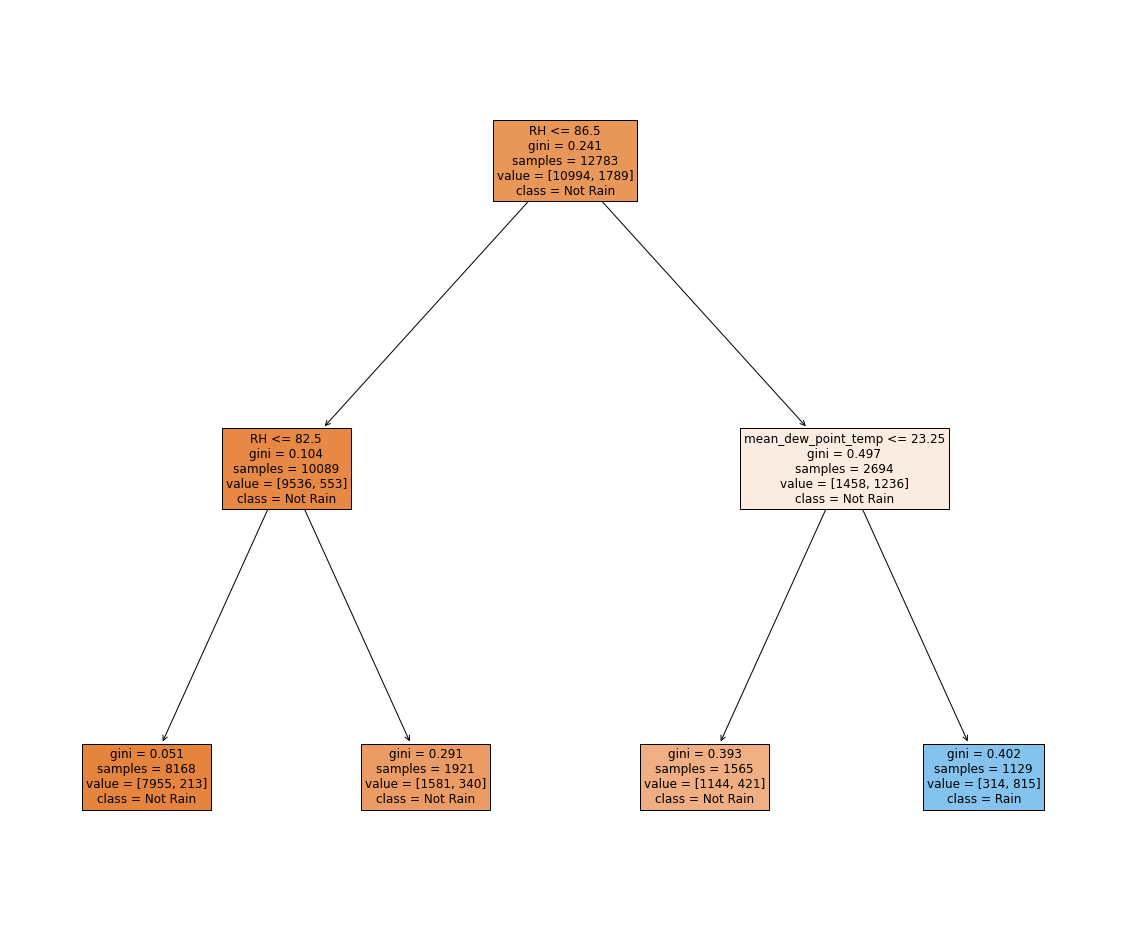

In [715]:
fig = plt.figure(figsize=(20,17))
a = plot_tree(dtree, feature_names=X_train.columns, fontsize=12, filled=True, 
              class_names=['Not Rain', 'Rain'])
#print(f1_score(y_true=y_train, y_pred=dtree.predict(X_train)))
#print(f1_score(y_true=y_test, y_pred=dtree.predict(X_test)))

print(accuracy_score(y_true=y_test, y_pred=dtree.predict(X_test)))
print(accuracy_score(y_true=y_train, y_pred=dtree.predict(X_train)))

In [917]:
#Very Hot Weather Warning Max temp > 33 C
HKweather['hotwarning'] = np.where(HKweather['max_Temp']>=33, 1, 0)
#Cold Weather Warning min temp < 12 C
HKweather['coldwarning'] = np.where(HKweather['min_temp']<=12, 1, 0)

In [919]:
HKweather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18262 entries, 0 to 18599
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   mean_temp             18262 non-null  float64
 1   Grass_Min_Temp        18262 non-null  object 
 2   max_Temp              18262 non-null  float64
 3   mean_amount_of_cloud  18262 non-null  float64
 4   mean_dew_point_temp   18262 non-null  float64
 5   mean_wet_bulb_temp    18262 non-null  float64
 6   min_temp              18262 non-null  float64
 7   pressure              18262 non-null  float64
 8   rainfall              18262 non-null  float64
 9   RH                    18262 non-null  float64
 10  date                  18262 non-null  object 
 11  daily_temp_diff       18262 non-null  float64
 12  year                  18262 non-null  int64  
 13  month                 18262 non-null  int64  
 14  month1                18262 non-null  object 
 15  israin             

In [969]:
X_train, X_test, y_train, y_test = train_test_split(HKweather.drop(['mean_temp','max_Temp','mean_dew_point_temp',
                                                                    'mean_wet_bulb_temp',
                                                                    'date','month1','israin','max_Temp',
                                                                    'min_temp','coldwarning','hotwarning'],axis=1), 
                                                   HKweather['hotwarning'], test_size=0.30, 
                                                    random_state=101)

ValueError: arrays must all be same length

In [970]:
#KNN

In [971]:
from sklearn.neighbors import KNeighborsClassifier

In [759]:
knn = KNeighborsClassifier(n_neighbors=1)

In [760]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [761]:
knn_pred = knn.predict(X_test)

In [762]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      5252
           1       0.41      0.38      0.40       227

    accuracy                           0.95      5479
   macro avg       0.69      0.68      0.69      5479
weighted avg       0.95      0.95      0.95      5479



In [763]:
print(confusion_matrix(y_test,knn_pred))

[[5128  124]
 [ 140   87]]


In [764]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

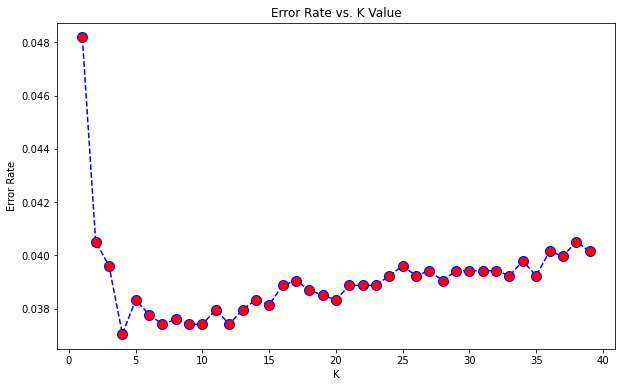

In [765]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [766]:
# NOW WITH K=5
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=5')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=5


[[5203   49]
 [ 161   66]]


              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5252
           1       0.57      0.29      0.39       227

    accuracy                           0.96      5479
   macro avg       0.77      0.64      0.68      5479
weighted avg       0.95      0.96      0.96      5479



In [953]:
X_train, X_test, y_train, y_test = train_test_split(HKweather.drop(['mean_temp','max_Temp',
                                                                    'date','month1','israin','max_Temp',
                                                                    'min_temp','hotwarning','coldwarning','year', 'month1', 'Grass_Min_Temp', 'month'],axis=1), 
                                                   HKweather['coldwarning'], test_size=0.30, 
                                                    random_state=101)

In [954]:
X_train

,mean_amount_of_cloud,mean_dew_point_temp,mean_wet_bulb_temp,pressure,rainfall,RH,daily_temp_diff
17793,51.0,14.1,17.3,1019.7,0.0,61.0,6.0
2723,65.0,22.5,24.1,1009.1,0.0,75.0,5.5
11541,92.0,10.5,13.0,1015.9,0.0,71.0,4.5
11530,5.0,11.7,14.6,1016.2,0.0,67.0,5.4
3882,61.0,24.6,25.5,1009.6,0.0,84.0,5.8
...,...,...,...,...,...,...,...
5801,35.0,25.1,26.4,1005.9,0.1,78.0,6.4
8155,64.0,14.9,17.0,1021.2,0.0,74.0,5.2
18074,79.0,25.6,26.8,1003.8,6.1,78.0,6.3
18262,61.0,18.7,19.8,1018.1,0.0,83.0,6.0


In [955]:
#Decision Tree

In [956]:
from sklearn.tree import DecisionTreeClassifier

In [957]:
dtree = DecisionTreeClassifier(max_depth=6)

In [958]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [959]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [960]:
def f1_scores_by_depth(depth):
    dtree = DecisionTreeClassifier(max_depth=depth)
    dtree.fit(X_train, y_train)
    return f1_score(y_true=y_train, y_pred=dtree.predict(X_train)), \
            f1_score(y_true=y_test, y_pred=dtree.predict(X_test))

<AxesSubplot:>

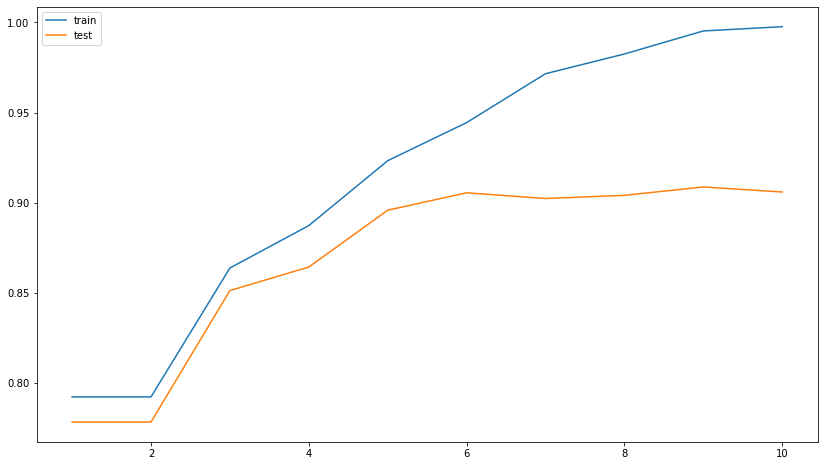

In [961]:
pd.DataFrame([f1_scores_by_depth(depth) for depth in range(1,11)], 
             columns=['train', 'test'], 
             index=range(1,11)) \
  .plot(figsize=(14,8))

In [962]:
predictions = dtree.predict(X_test)

In [963]:
from sklearn.metrics import classification_report,confusion_matrix

In [964]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5226
           1       0.91      0.91      0.91       253

    accuracy                           0.99      5479
   macro avg       0.95      0.95      0.95      5479
weighted avg       0.99      0.99      0.99      5479



In [965]:
print(confusion_matrix(y_test,predictions))

[[5202   24]
 [  23  230]]


In [966]:
from sklearn.tree import plot_tree

0.9914217922978645
0.9945239771571619


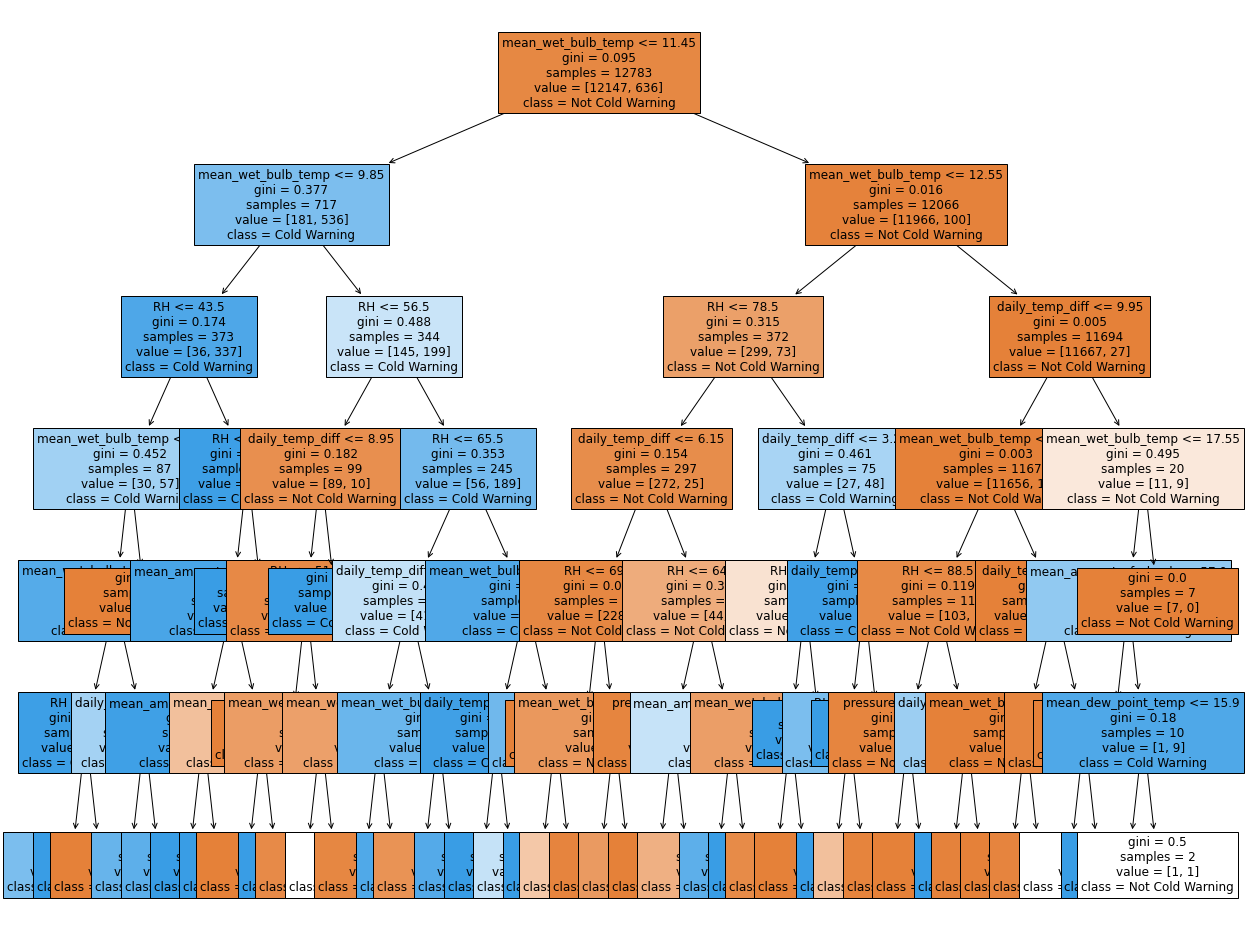

In [968]:
fig = plt.figure(figsize=(20,17))
a = plot_tree(dtree, feature_names=X_train.columns, fontsize=12, filled=True, 
              class_names=['Not Cold Warning', 'Cold Warning'])
#print(f1_score(y_true=y_train, y_pred=dtree.predict(X_train)))
#print(f1_score(y_true=y_test, y_pred=dtree.predict(X_test)))

print(accuracy_score(y_true=y_test, y_pred=dtree.predict(X_test)))
print(accuracy_score(y_true=y_train, y_pred=dtree.predict(X_train)))
plt.savefig('/Users/ansonleung/Desktop/project.jpg')

In [791]:
X=HKweather.drop(['mean_temp','max_Temp','mean_dew_point_temp','year','month' ,'mean_wet_bulb_temp',
                                                                    'date','month1','israin','max_Temp',
                                                                    'min_temp','hotwarning','coldwarning'],axis=1)

In [792]:
y=HKweather['mean_temp']


In [793]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=101)

In [794]:
from sklearn.preprocessing import StandardScaler

In [795]:
X_train_scaled_features = StandardScaler().fit_transform(X_train.values)
X_test_scaled_features = StandardScaler().fit_transform(X_test.values)

In [796]:
X_test_scaled_features

array([[ 0.11195597,  0.68499352, -0.29837143, -1.17649619, -0.43091941],
       [ 0.79267368, -0.81913106,  0.99690355,  1.23254746,  0.48753079],
       [-2.61091488,  0.62422081, -0.29837143, -0.79104921,  1.7996025 ],
       ...,
       [ 1.11301142, -0.08985854, -0.29837143,  0.46165349, -2.07100905],
       [-0.64884618,  0.18361866, -0.29837143,  0.17256825,  0.02830569],
       [-0.08825512, -0.60642657, -0.28086771,  0.36529174,  1.86520608]])

In [797]:
X_test_scaled_features_df = pd.DataFrame(X_test_scaled_features, index= X_test.index, columns=X_test.columns)
X_train_scaled_features_df = pd.DataFrame(X_train_scaled_features, index= X_train.index, columns=X_train.columns)


In [798]:
from sklearn.linear_model import LinearRegression

In [799]:
lm = LinearRegression()

In [800]:
lm.fit(X_train_scaled_features, y_train)

LinearRegression()

In [801]:
print(lm.intercept_)

23.248142063678316


In [803]:
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
mean_amount_of_cloud,-1.073952
pressure,-4.618586
rainfall,-0.456073
RH,0.080446
daily_temp_diff,-0.084610


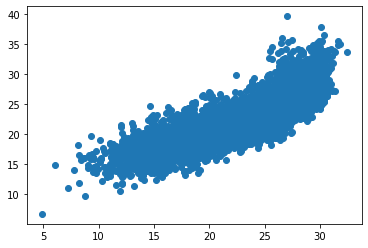

In [804]:
predictions = lm.predict(X_test_scaled_features_df)
plt.scatter(y_test, predictions)

In [805]:
from sklearn import metrics
from sklearn.metrics import r2_score

In [806]:
r2= r2_score(y_test, predictions)
r2

0.7344625652387584

In [807]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 2.1171305304312944
MSE: 7.0328002902790665
RMSE: 2.6519427388763632
